<a href="https://colab.research.google.com/github/alvinadar/K-Means-Clustering/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised ML

- a type of ML where the model is trained on data without `explicit labels`.
- Unlike supervised ML, where the algorithms learns from labeled data (input-output pairs), unsupervised ML deals with unlabeled data
- aim is to `find hidden patterns, relationships within`.


### Common Techniques in Unsupervised ML:

1. Clustering:
- Groups smilar data points together based on their features (x).
- Example Algorithm:
  - K-Means Clustering
  - Hierachiccal Clustering
  - DBSCAN

2. Dimensionality Reduction:
- Reduces the number of features (dimensions) in the data while preserving the structure.

## Challenges in Unsupervised ML:

1. No Ground Truth
  - Since there are no labels, it can be hard to evalutea the performance of the model

2. Interpretability
  - The results may be harder to interpret compared to Supervised Learning

3. Choosing the Right Algorithm
  - Different algorithms work better for different types of data and tasks.

Example Workflow:

1. `Data Preprocessing`: Clean and normalize the data.
2. `Choose an Algorithm`: Select a clustering or dimensionality reduction technique.
3. `Train the Model`: Fit the model to the data.
4. `Evaluate`: Use metrics like silhouette score (for clustering) or reconstruction error (for autoencoders) to assess performance.
5. `Interpret Results`: Analyze the clusters, reduced dimensions, or discovered patterns.

In [ ]:
# Businness Problems

# Supervised ML (Regression)
# 1. Sales Forecasting
# 2. House Price Prediction
# 3. Employee Salary Prediction
# 4. Energy Consumption Prediction

# Supervised ML (Classification)
# 1. Spam Detection
# 2. Credit Scoring
# 3. Disease Diagnosis

# Unsupervised ML --> find hidden patterns (cluster)
# 1. Customer Segmentation (group customers based on purchasing behaviour)
# 2. Product Recommendation
# 3. Fraud Detection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import seaborn as sns

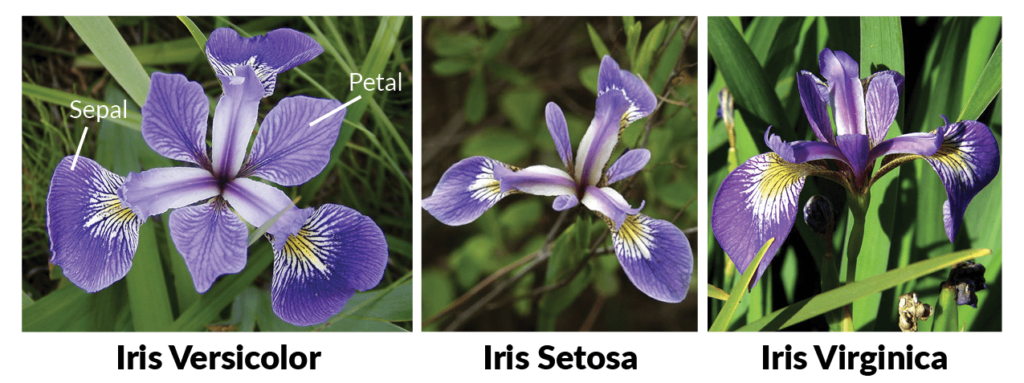

In [ ]:
# load iris dataset
iris = load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df["target"] = iris.target # output

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.target_names
# 0 --> setosa
# 1 --> versicolor
# 2 --> virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# update the target column with species names
df["target"] = iris.target_names[iris.target]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df[df['target'] == "virginica"]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


In [ ]:
df["target"].value_counts()

,count
target,
setosa,50
versicolor,50
virginica,50


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


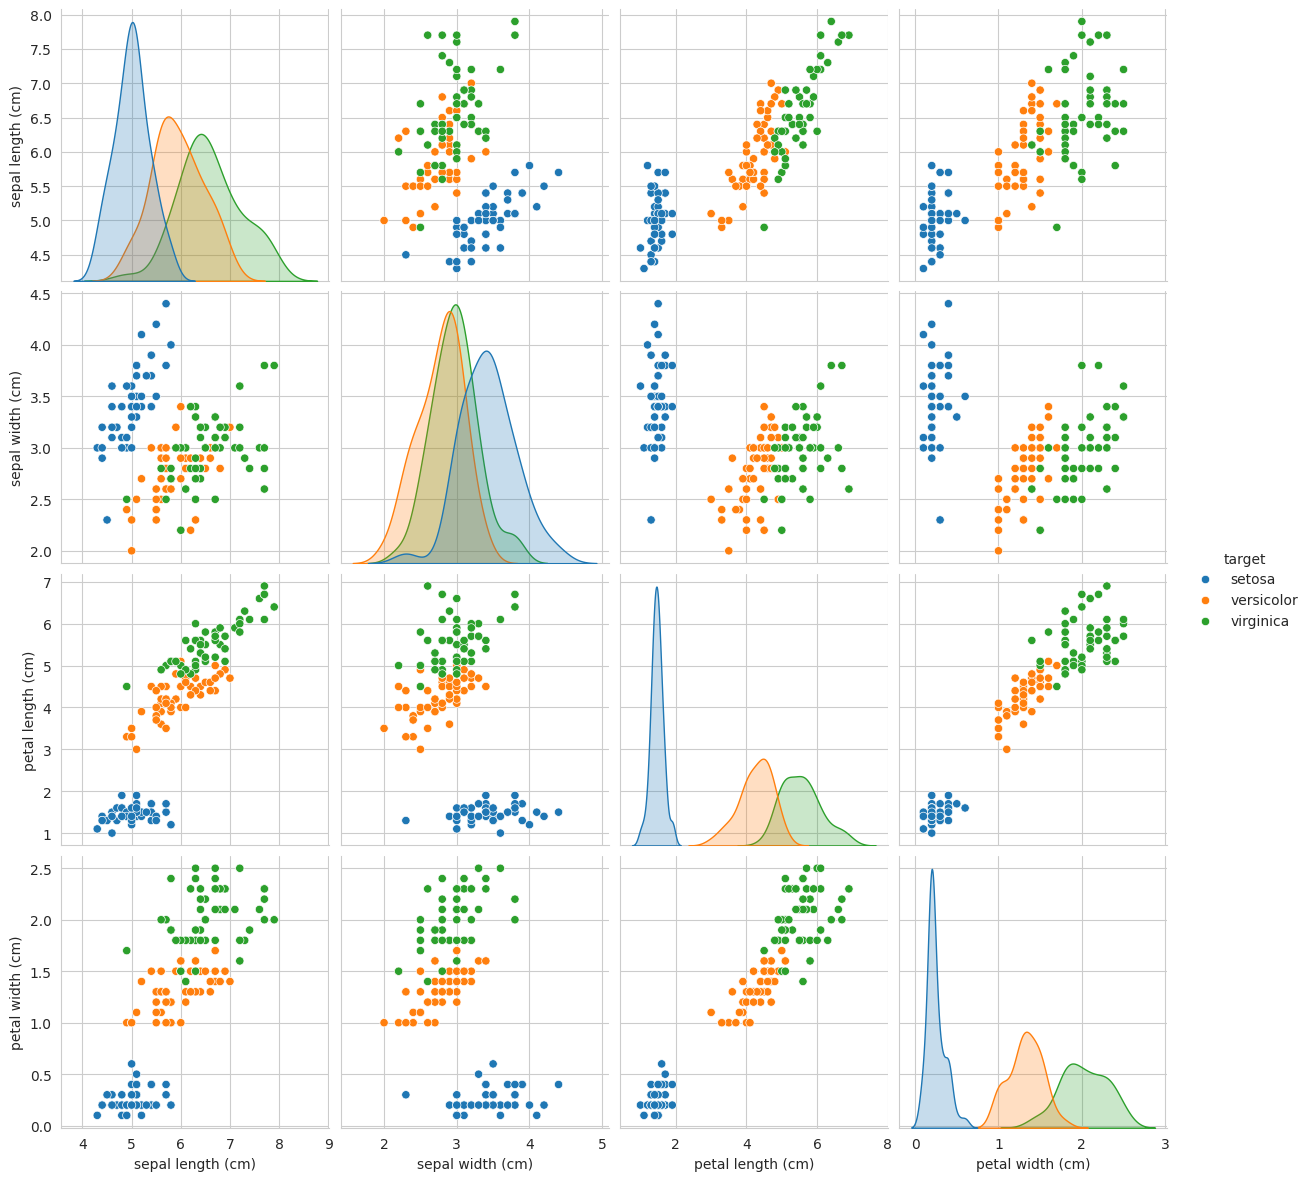

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="target",size=3);
plt.show()

# K Means Clustering

In [ ]:
X = iris.data # features
y = iris.target # target labels (not used in unsupervised ML)

In [ ]:
feature_names = iris.feature_names
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
df = pd.DataFrame(X, columns = feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


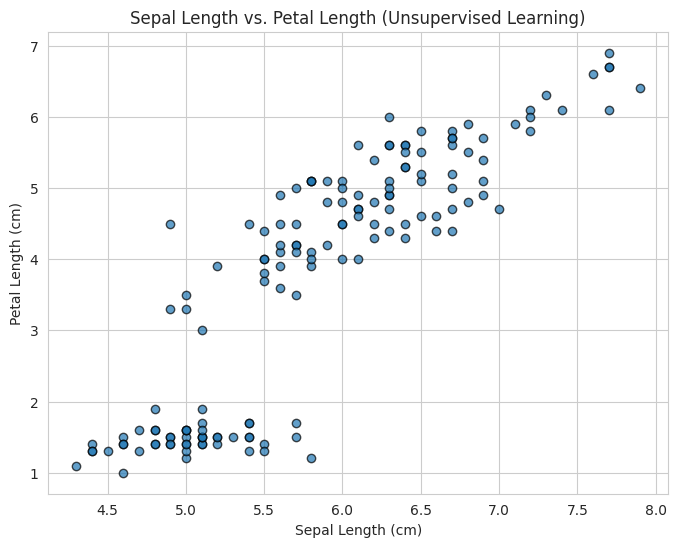

In [ ]:
# Plot Sepal Length vs. Petal Length
plt.figure(figsize=(8, 6))
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], alpha=0.7, edgecolor='k')
plt.title('Sepal Length vs. Petal Length (Unsupervised Learning)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.grid(True)
plt.show()

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

# How to Implementing K-Means Clustering ?

* Choose the number of clusters k
* Select k random points from the data as centroids
* Assign all the points to the closest cluster centroid
* Recompute the centroids of newly formed clusters
* Repeat steps 3 and 4 (stop when the all centroids do not move)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Standardize the features
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
#Convert the scaled data to a dataframe
df_scaled = pd.DataFrame(X_scaled,columns=feature_names)

In [ ]:
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


#Identify the number of clusters K

##We need to plot the elbow graph

* WCSS-Within Cluster Sum of Squared also known as Inertia in sklearn library.
* WCSS measures how close the data points are to thier assigned cluster centroids . (Variation of the data )
* The lower the WCSS generally indicates better clustering , which points tightly grouped around thier centroids

`Plot WCSS vs number of clusters`


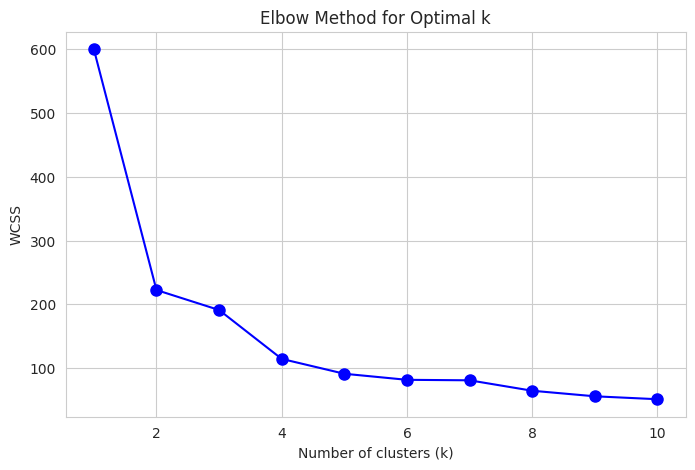

In [ ]:
wcss = []

k_values = range(1,11)

for k in k_values:
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
k = 3

kmeans = KMeans(n_clusters=k,random_state=42)
kmeans.fit(X_scaled)

#Get the cluster labels and the centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

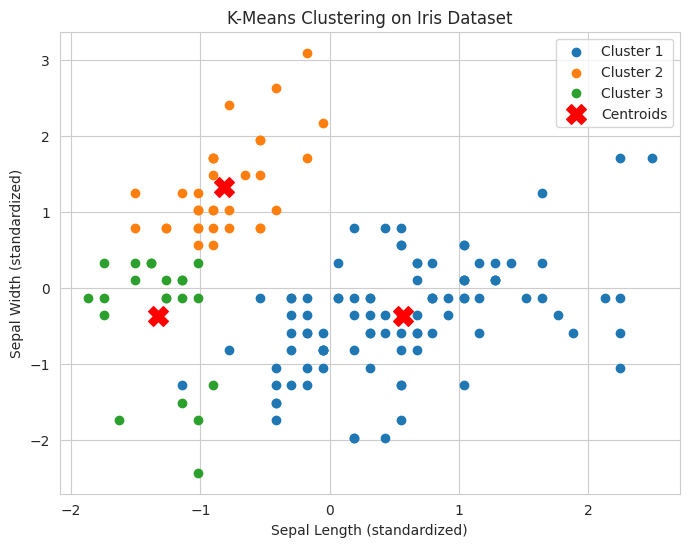

In [ ]:
# Plot the clusters
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for i in range(k):
    plt.scatter(X_scaled[labels == i, 0], X_scaled[labels == i, 1], label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()

In [ ]:
#Predict the output of a new data

# Function to predict flower type based on new input features

def predict_flower_type(new_flower,kmeans_model,scaler,cluster_mapping):
  new_flower_scaled = scaler.transform([new_flower])

  cluster = kmeans_model.predict(new_flower_scaled)[0]

  return cluster_mapping.get(cluster,"Unknown Cluster")

In [ ]:
cluster_mapping ={
    i: iris.target_names[np.argmax(np.bincount(iris.target[kmeans.labels_ == i]))]
    for i in range(kmeans.n_clusters)
}

In [ ]:
new_flower = [6.3, 3.3, 6.0, 2.5]
predicted_species = predict_flower_type(new_flower, kmeans, scaler, cluster_mapping)
print(f"Predicted Flower Type: {predicted_species}")
#6.3	3.3	6.0	2.5

Predicted Flower Type: virginica


#Example 2 : Customer Segmentation

##We’ll use a fake dataset of customer locations to group them based on geographic proximity.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Fake customer coordinates (e.g., latitude, longitude)
X = np.array([
    [1, 2], [1.5, 1.8], [5, 8],
    [8, 8], [1, 0.6], [9, 11],
    [8, 2], [10, 2], [9, 3],
])


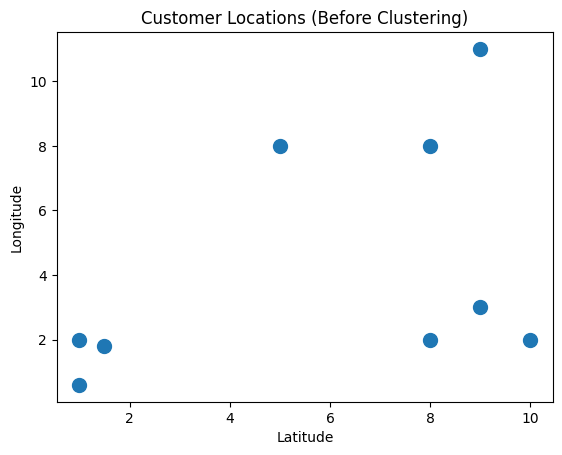

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.title("Customer Locations (Before Clustering)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

#Identify the k value

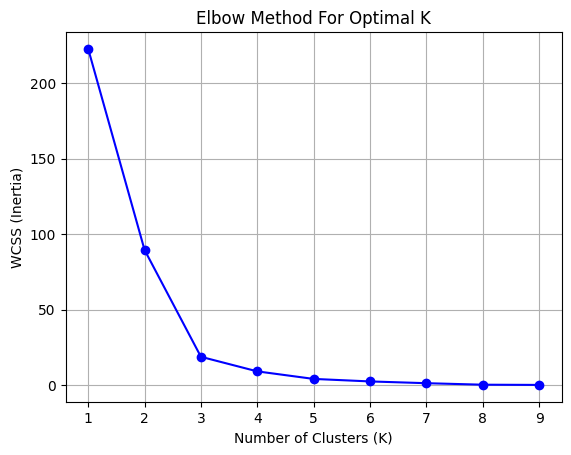

In [ ]:
# Calculate WCSS for different values of K
wcss = []
k_range = range(1,10)

for k in k_range:
  kmeans = KMeans(n_clusters = k,random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

# Create KMeans object with K=3 clusters

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

#Get the cluster center and labels

In [ ]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

#Plot the clusters

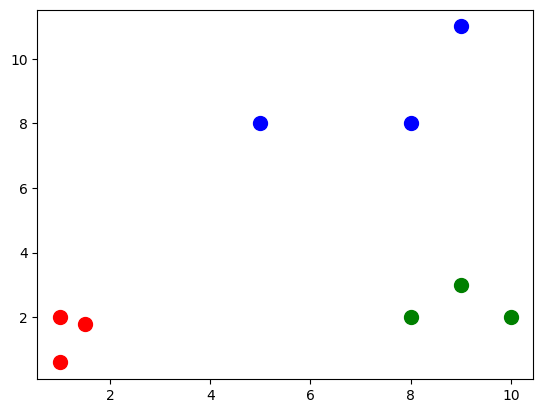

In [ ]:
colors = ['r','g','b']
for i in range(len(X)):
  plt.scatter(X[i][0],X[i][1],c = colors[labels[i]],s=100)

#Plot the centroids

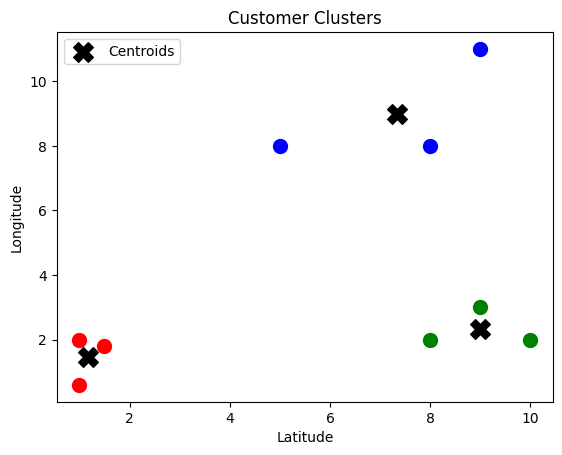

In [ ]:
colors = ['r','g','b']
for i in range(len(X)):
  plt.scatter(X[i][0],X[i][1],c = colors[labels[i]],s=100)


plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')
plt.title("Customer Clusters")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()

#Predict the new customer location

In [ ]:
new_customer = np.array([[5,8]])
cluster = kmeans.predict(new_customer)
if cluster[0] == 0:
  print("Penang")
elif cluster[0] == 1:
  print("Kelantan")
else:
  print("Kuala Lumpur")

Kuala Lumpur


In [ ]:
print(cluster[0])

1


In [ ]:
import pandas as pd
import numpy as np
import random

def generate_ict_test_data(num_samples=1000):
    """Generates synthetic ICT test data."""

    data = {
        'TestID': [f'TEST_{i:04d}' for i in range(num_samples)],
        'SerialNumber': [f'SN_{random.randint(100000, 999999)}' for _ in range(num_samples)],
        'FixtureID': [f'FIX_{random.choice(["A", "B", "C"])}{random.randint(1, 10)}' for _ in range(num_samples)],
        'TestVoltage': np.random.uniform(3.0, 5.5, num_samples).round(2),
        'TestCurrent': np.random.uniform(0.1, 2.0, num_samples).round(3),
    }

    df = pd.DataFrame(data)
    return df

# Generate and display the synthetic data
ict_data = generate_ict_test_data(1000)
print(ict_data.head())
ict_data.to_csv("ict_test_data.csv", index=False) # Saves to CSV

      TestID SerialNumber FixtureID  TestVoltage  TestCurrent
0  TEST_0000    SN_411808    FIX_B4         4.90        1.489
1  TEST_0001    SN_221248    FIX_C3         3.78        1.610
2  TEST_0002    SN_337298    FIX_A6         4.02        1.193
3  TEST_0003    SN_974857    FIX_A4         3.12        0.927
4  TEST_0004    SN_989966   FIX_A10         5.41        0.491


In [ ]:
# Select relevant features for clustering
features = ict_data[['TestVoltage', 'TestCurrent']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

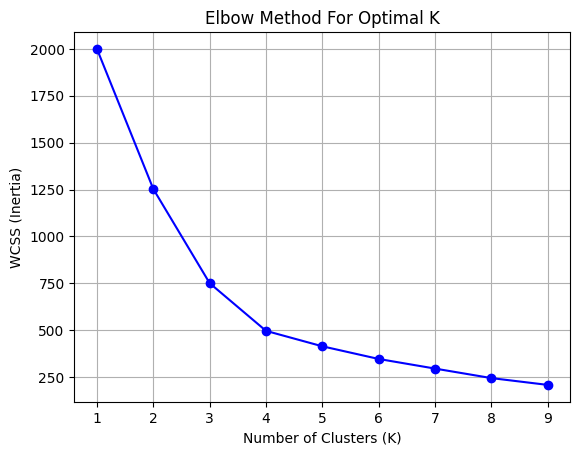

In [ ]:
# Calculate WCSS for different values of K
wcss = []
k_range = range(1,10)

for k in k_range:
  kmeans = KMeans(n_clusters = k,random_state=0)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

In [ ]:
#Apply k means
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=0)

In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
labels = kmeans.predict(X_scaled)

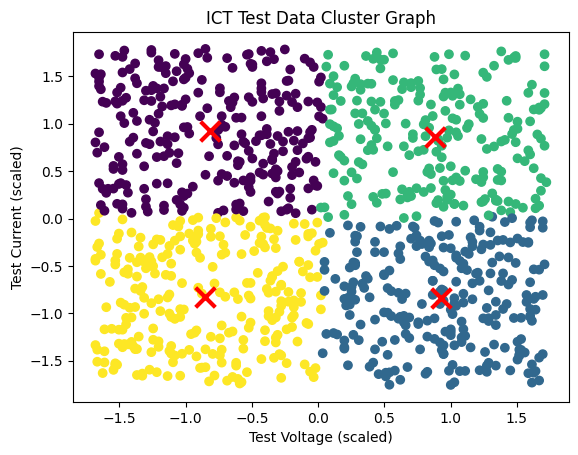

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('ICT Test Data Cluster Graph')
plt.xlabel('Test Voltage (scaled)')
plt.ylabel('Test Current (scaled)')
plt.show()